In [1]:
square=[x**2 for x in range(20)]
print(square)

[0, 1, 4, 9, 16, 25, 36, 49, 64, 81, 100, 121, 144, 169, 196, 225, 256, 289, 324, 361]


In [2]:
def square(x):
    return x**2
squares=[square(x) for x in range(20) if x%2==0]
print(squares)

[0, 4, 16, 36, 64, 100, 144, 196, 256, 324]


In [3]:
import pandas as pd


In [6]:
# Sample data
balances = [1000, 2500, 4300, 1200, 5000]
# Creating a Series
balance_series = pd.Series(balances, name="Account Balance")
print(balance_series)
print(balance_series[3])
highbalance=balance_series[balance_series>1200]
print(highbalance)


0    1000
1    2500
2    4300
3    1200
4    5000
Name: Account Balance, dtype: int64
1200
1    2500
2    4300
4    5000
Name: Account Balance, dtype: int64


In [ ]:
# Part 1
#1.Importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
pd.options.display.max_rows = None
pd.options.display.max_columns = None




In [25]:
# 2.Load the dataset using pandas

data = pd.read_csv('Churn_Modelling.csv', delimiter=',')
data.shape

# The Df has 1000 rows with 14 attributes. We review this further to identify what attributes 
# will be necessary and what data manipulation needs to be carried out before 
# Exploratory analysis and prediction modelling
data.head()
#df.info()

RowNumber  CustomerId   Surname  CreditScore Geography  Gender  Age  \
0          1    15634602  Hargrave          619    France  Female   42   
1          2    15647311      Hill          608     Spain  Female   41   
2          3    15619304      Onio          502    France  Female   42   
3          4    15701354      Boni          699    France  Female   39   
4          5    15737888  Mitchell          850     Spain  Female   43   

   Tenure    Balance  NumOfProducts  HasCrCard  IsActiveMember  \
0       2       0.00              1          1               1   
1       1   83807.86              1          0               1   
2       8  159660.80              3          1               0   
3       1       0.00              2          0               0   
4       2  125510.82              1          1               1   

   EstimatedSalary  Exited  
0        101348.88       1  
1        112542.58       0  
2        113931.57       1  
3         93826.63       0  
4         79084.10       0

In [26]:
# 3 Create functions to:
# 3.1Calculate the average balance for different age groups

# Function to categorize customers into age groups
def categorize_age_group(Age):
    if Age < 30:
        return 'Young'
    elif Age < 50:
        return 'Middle_aged'
    else:
        return 'Senior'

# Function to calculate the average balance for different age groups
def average_balance_by_age_group(df):
    # Create a new column 'age_group' by applying the categorize_age_group function
    df['AgeGroup'] = df['Age'].apply(categorize_age_group)
    
    # Group by the 'age_group' column and calculate the average balance
    age_group_balance = df.groupby('AgeGroup')['Balance'].mean().round(2)
    
    return age_group_balance
# Convert the data into a pandas DataFrame
df = pd.DataFrame(data)
# Call the function to calculate the average balance by age group
result = average_balance_by_age_group(df)
# Print the result
print(result)


AgeGroup
Middle_aged    76352.77
Senior         80429.11
Young          73698.72
Name: Balance, dtype: float64


In [27]:
# Alternatively Age grouping using pd.cut()
def average_balance_by_age_group_v2(df):
    # Define age bins and labels
    bins = [0, 30, 50, float('inf')]  # Age ranges: <30, <50, >=50
    labels = ['Young', 'Middle_age', 'Senior']
    
    # Create a new 'age_group' column using pd.cut()
    df['AgeGroup'] = pd.cut(df['Age'], bins=bins, labels=labels, right=False)
    
    # Group by the 'age_group' column and calculate the average balance
    age_group_balance = df.groupby('AgeGroup')['Balance'].mean().round(2)
    
    return age_group_balance

# Call the alternative function
result_v2 = average_balance_by_age_group_v2(df)
print(result_v2)

AgeGroup
Young         73698.72
Middle_age    76352.77
Senior        80429.11
Name: Balance, dtype: float64


C:\Users\Zewdu\AppData\Local\Temp\ipykernel_11316\1908529304.py:11: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  age_group_balance = df.groupby('AgeGroup')['Balance'].mean().round(2)


In [28]:
# Count customers by country using dictionaries

df = pd.DataFrame(data)

# Function to count customers by country
def count_customers_by_country(df):
    # Group by the 'country' column and count the number of customers in each country
    country_counts = data['Geography'].value_counts().to_dict()
    return country_counts

# Call the function and print the result
result = count_customers_by_country(df)
print(result)

{'France': 5014, 'Germany': 2509, 'Spain': 2477}


In [ ]:
# Part 2 Data Structure Manipulation
# 1. Create lists of churned and retained customers

df = pd.DataFrame(data)


# Create a list of churned customers
churned_customers = df[df['Exited'] == 1]['Surname'].tolist()

# Create a list of retained customers
retained_customers = df[df['Exited'] == 0]['Surname'].tolist()

# Print the results
print("Churned Customers:", churned_customers)
print("Retained Customers:", retained_customers)


Churned Customers: ['Hargrave', 'Onio', 'Chu', 'Obinna', 'Romeo', 'Gerasimov', 'Azikiwe', 'Lombardo', 'Clarke', 'Lavine', 'Martin', 'Okagbue', 'Parkhill', 'Yoo', "T'ien", 'Konovalova', 'Leonard', 'Gant', 'Sharpe', 'Heap', 'Dunbabin', 'Mauldon', "T'ang", 'Fanucci', 'Chidozie', 'Fuller', 'MacDonald', 'Piccio', 'Chia', 'Vasin', 'Greeves', 'Taylor', 'Alexeeva', 'Chou', 'Taverner', 'Taubman', 'Pinto', 'Yost', 'Ashbolt', 'Cocci', 'Onwumelu', 'He', 'Onuora', 'McDonald', 'Hackett', 'Watson', 'Shih', 'Fuller', 'Stevenson', 'Poole', 'Cattaneo', "O'Sullivan", 'Dumetochukwu', 'Synnot', 'Johnston', 'McIntosh', 'Ifesinachi', 'Liao', 'Fielding', 'Bevington', 'Toscani', "K'ung", 'Huang', 'Chuang', 'Chang', 'Hewitt', 'Balashov', 'Doyle', 'Lung', 'Hunter', 'Knowles', 'Hsueh', 'Nwabugwu', 'Young', 'Kerr', 'Ricci', 'Robinson', 'Gardiner', 'Distefano', 'Cunningham', 'Demidov', 'Outhwaite', 'Mitchell', 'Chiang', 'Heath', "T'ang", 'Fitch', 'Boyle', 'Nwachinemelu', 'Manna', 'Parkinson', 'Uspensky', 'Yin', 'Ev

In [30]:
#2. Use list comprehension to filter high-value customers (balance > 100,000)


# Convert the data into a pandas DataFrame
df = pd.DataFrame(data)

# Use list comprehension to filter high-value customers with balance > 100,000
high_value_customers = [row['Surname'] for _, row in df.iterrows() if row['Balance'] > 100000]

# Print the result
print("High-Value Customers:", high_value_customers)


High-Value Customers: ['Onio', 'Mitchell', 'Chu', 'Obinna', 'He', 'H?', 'Bearce', 'Goforth', 'Romeo', 'Young', 'McWilliams', 'Sanderson', 'Lombardo', 'Watson', 'Clarke', 'Osborne', 'Lavine', 'Bianchi', 'Tyler', 'Martin', 'Okagbue', 'Yin', 'Buccho', 'Chidiebele', 'Trevisani', 'Parkhill', 'Phillipps', 'Tsao', 'Hunter', 'Clark', 'Jackson', 'Hammond', 'Brownless', 'Chibugo', 'Glauert', 'Konovalova', 'Palermo', 'Ballard', 'Cavenagh', 'Postle', 'Gant', 'Ritchie', 'Fiorentini', 'Graham', 'Mauldon', 'Walkom', 'Rowntree', 'Thorpe', 'Chiemela', 'Fanucci', 'Ko', 'Welch', 'Chidozie', 'Wu', 'Culbreth', 'Kennedy', 'Calabresi', 'Fuller', 'Piccio', 'Fernie', 'Kaodilinakachukwu', 'Cocci', 'Chinweike', 'Arthur', 'Ma', 'Chia', 'Vasin', 'Groves', 'Forwood', 'Madukwe', 'Bennelong', 'Olisanugo', 'Chukwufumnanya', 'Humphries', 'Chigolum', 'Wilkinson', 'Treacy', 'Taverner', 'Sherman', 'Taubman', 'Robinson', 'Hawkins', 'Yost', 'Ting', 'Fu', 'Okechukwu', 'Campbell', 'Ashbolt', 'Rozier', 'Ogbonnaya', 'Tsai', 'Al

In [34]:
# 3. Create a dictionary with customer statistics by country
# Convert the data into a pandas DataFrame
df = pd.DataFrame(data)

# Group by 'country' and aggregate customer statistics
country_stats = {
    country: {
        'customer_count': group.shape[0],
        'average_balance': round(group['Balance'].mean(), 2),
        'active_members': group['IsActiveMember'].sum()
    }
    for country, group in df.groupby('Geography')
}

# Print the dictionary with customer statistics by country
print(country_stats)


{'France': {'customer_count': 5014, 'average_balance': np.float64(62092.64), 'active_members': np.int64(2591)}, 'Germany': {'customer_count': 2509, 'average_balance': np.float64(119730.12), 'active_members': np.int64(1248)}, 'Spain': {'customer_count': 2477, 'average_balance': np.float64(61818.15), 'active_members': np.int64(1312)}}


In [39]:
# Part 3 Data Cleaning and Preparation
# 1. Check for missing values and handle them appropriately
# To check for and handle missing values in a pandas DataFrame, follow these steps:

# Identify missing values using methods like isnull() and sum().
# Handle missing values by either:
# Removing rows/columns with missing data.
# Filling missing values with appropriate values (e.g., mean, median, mode).
# Convert the data into a pandas DataFrame
df = pd.DataFrame(data)

# Check for missing values
print("Missing values in each column:")
print(df.isnull().sum())

# Handling missing values
# Option 1: Drop rows with any missing values
df_cleaned = df.dropna()

# Option 2: Fill missing values (example: fill 'age' with mean, 'balance' with median)
df_filled = df.copy()
df_filled['Age'].fillna(df['Age'].mean(), inplace=True)
df_filled['Balance'].fillna(df['Balance'].median(), inplace=True)
df_filled['Geography'].fillna('Unknown', inplace=True)
df_filled['IsActiveMember'].fillna(0, inplace=True)  # Assuming 0 for inactive by default

# Print the cleaned DataFrame
print("\nDataFrame after filling missing values:")
print(df_filled)


Missing values in each column:
RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64


C:\Users\Zewdu\AppData\Local\Temp\ipykernel_11316\1340053861.py:22: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_filled['Age'].fillna(df['Age'].mean(), inplace=True)
C:\Users\Zewdu\AppData\Local\Temp\ipykernel_11316\1340053861.py:23: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.


DataFrame after filling missing values:
      RowNumber  CustomerId                  Surname  CreditScore Geography  \
0             1    15634602                 Hargrave          619    France   
1             2    15647311                     Hill          608     Spain   
2             3    15619304                     Onio          502    France   
3             4    15701354                     Boni          699    France   
4             5    15737888                 Mitchell          850     Spain   
5             6    15574012                      Chu          645     Spain   
6             7    15592531                 Bartlett          822    France   
7             8    15656148                   Obinna          376   Germany   
8             9    15792365                       He          501    France   
9            10    15592389                       H?          684    France   
10           11    15767821                   Bearce          528    France   
11         

In [40]:
# 2. Convert categorical variables to numerical using pandas
#To convert categorical variables to numerical in a pandas DataFrame, 
#you can use methods like pd.get_dummies() for one-hot encoding or LabelEncoder from sklearn for label encoding

df = pd.DataFrame(data)

# One-hot encode the 'country' column
df_encoded = pd.get_dummies(df, columns=['Geography'])

# Print the resulting DataFrame
print("DataFrame after one-hot encoding:")
print(df_encoded)


DataFrame after one-hot encoding:
      RowNumber  CustomerId                  Surname  CreditScore  Gender  \
0             1    15634602                 Hargrave          619  Female   
1             2    15647311                     Hill          608  Female   
2             3    15619304                     Onio          502  Female   
3             4    15701354                     Boni          699  Female   
4             5    15737888                 Mitchell          850  Female   
5             6    15574012                      Chu          645    Male   
6             7    15592531                 Bartlett          822    Male   
7             8    15656148                   Obinna          376  Female   
8             9    15792365                       He          501    Male   
9            10    15592389                       H?          684    Male   
10           11    15767821                   Bearce          528    Male   
11           12    15737173               

In [ ]:
#  Label Encoding with LabelEncoder

from sklearn.preprocessing import LabelEncoder

# Create a LabelEncoder object
label_encoder = LabelEncoder()

# Apply label encoding to the 'country' column
df['country_encoded'] = label_encoder.fit_transform(df['Geography'])

# Print the resulting DataFrame
print("DataFrame after label encoding:")
print(df)

DataFrame after label encoding:
      RowNumber  CustomerId                  Surname  CreditScore Geography  \
0             1    15634602                 Hargrave          619    France   
1             2    15647311                     Hill          608     Spain   
2             3    15619304                     Onio          502    France   
3             4    15701354                     Boni          699    France   
4             5    15737888                 Mitchell          850     Spain   
5             6    15574012                      Chu          645     Spain   
6             7    15592531                 Bartlett          822    France   
7             8    15656148                   Obinna          376   Germany   
8             9    15792365                       He          501    France   
9            10    15592389                       H?          684    France   
10           11    15767821                   Bearce          528    France   
11           12    1

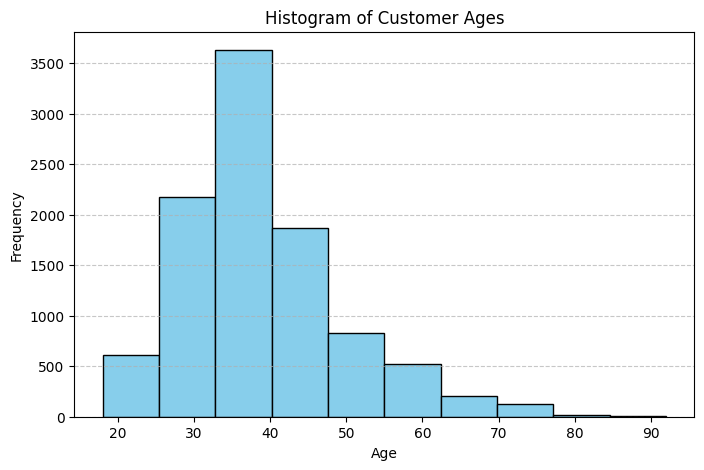

In [42]:
#Part 4: Exploratory Data Analysis and Visualization
# Create basic plots:
# 4.1 Histogram of customer ages
# using matplotlib
df = pd.DataFrame(data)

# Create a histogram for customer ages
plt.figure(figsize=(8, 5))
plt.hist(df['Age'], bins=10, color='skyblue', edgecolor='black')
plt.title('Histogram of Customer Ages')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Show the plot
plt.show()


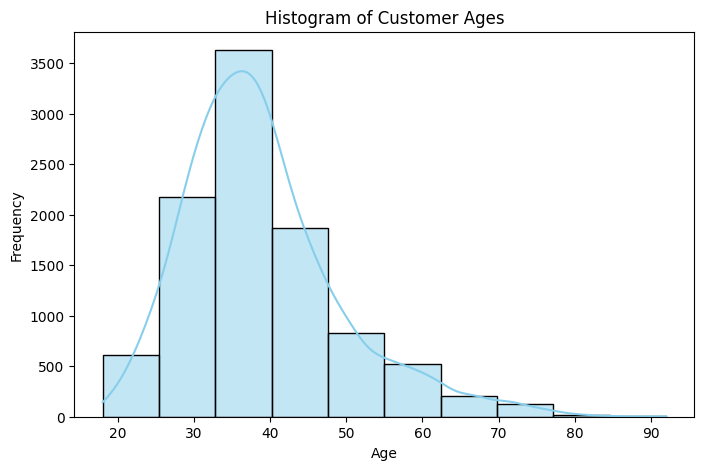

In [44]:
# Using Searbon
plt.figure(figsize=(8, 5))
sns.histplot(df['Age'], bins=10, kde=True, color='skyblue')
plt.title('Histogram of Customer Ages')
plt.xlabel('Age')
plt.ylabel('Frequency')

# Show the plot
plt.show()

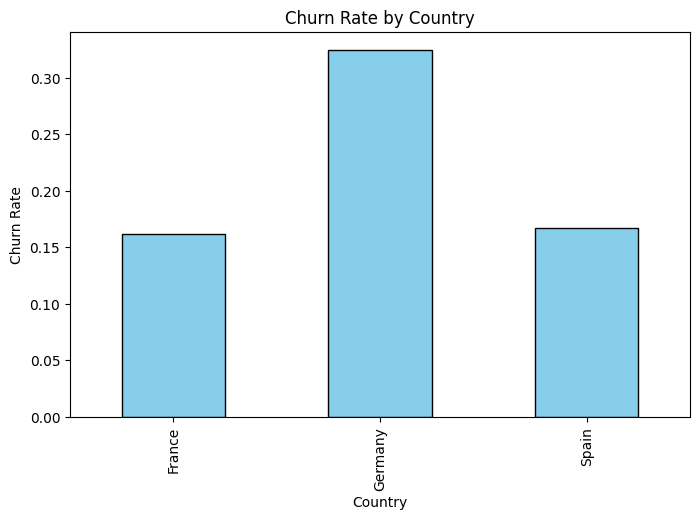

In [45]:
# 4.2 Bar plot of churn rate by country
# Convert the data into a pandas DataFrame
df = pd.DataFrame(data)

# Calculate churn rate by country
churn_rate = df.groupby('Geography')['Exited'].mean()

# Create a bar plot for churn rate by country
plt.figure(figsize=(8, 5))
churn_rate.plot(kind='bar', color='skyblue', edgecolor='black')

# Add titles and labels
plt.title('Churn Rate by Country')
plt.xlabel('Country')
plt.ylabel('Churn Rate')

# Show the plot
plt.show()

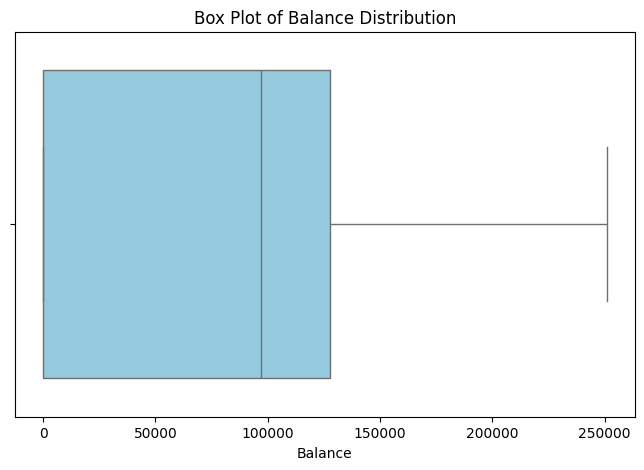

In [47]:
# 4.3 Box plot of balance distribution
# Usinf searbon 

# Convert the data into a pandas DataFrame
df = pd.DataFrame(data)

# Create a box plot for balance distribution
plt.figure(figsize=(8, 5))
sns.boxplot(x=df['Balance'], color='skyblue')

# Add titles and labels
plt.title('Box Plot of Balance Distribution')
plt.xlabel('Balance')

# Show the plot
plt.show()